# Annual modulation of the DM-electron scattering rate in Xenon

We pre-tabulate the values of $g(v_{\rm min},t)$ in the file `erec/Tabulate_gmin.py` so that we don't need to worry about that. Then here we just calculate the rates for each day in those tables.

In [183]:
import sys
sys.path.append('../erec')
from numpy import *
import matplotlib.pyplot as plt
from LabFuncs import *
from Params import *
from DMFuncs import *
from PlotFuncs import *
from HaloFuncs import *
from Params import *
from AtomicFuncs import *

dat1 = loadtxt('../data/gvmin/gvmin_Halo.txt')
nt = shape(dat1)[0]-1
vmin = dat1[0,:]
nv = size(vmin)
gmin_Halo = dat1[1:,:]
dat1 = loadtxt('../data/gvmin/gvmin_Saus.txt')
gmin_Saus = dat1[1:,:]
dat1 = loadtxt('../data/gvmin/gvmin_S1.txt')
gmin_S1 = dat1[1:,:]
dat1 = loadtxt('../data/gvmin/gvmin_S2.txt')
gmin_S2 = dat1[1:,:]

# gf
dat1 = loadtxt('../data/gvmin/gvmin_Halo_gf.txt')
gmin_Halo_gf = dat1[1:,:]
dat1 = loadtxt('../data/gvmin/gvmin_Saus_gf.txt')
gmin_Saus_gf = dat1[1:,:]
dat1 = loadtxt('../data/gvmin/gvmin_S1_gf.txt')
gmin_S1_gf = dat1[1:,:]
dat1 = loadtxt('../data/gvmin/gvmin_S2_gf.txt')
gmin_S2_gf = dat1[1:,:]

days = linspace(0.0,365-365/(1.0*nt),nt)

## Now we use the tabulated $g(v_{\rm min},t)$ to calculate all the rates for each one, choosing a range of $m_{\rm DM}$ and for both DM form factors (heavy/light mediators)

In [184]:
gmin_SHMpp = (1-0.2)*gmin_Halo + 0.2*gmin_Saus
gmin_SHMpp_gf = (1-0.2)*gmin_Halo_gf + 0.2*gmin_Saus_gf

nq = 40 # accuracy of q integral
ne = 100 # number of energies

sigma_e = 1.0e-37 # cm^2
E_r_vals = logspace(-1.0,3.0,ne)/1000.0 # keV

nm = 2
m = [10.0,1000.0]

R_H_SHMpp = zeros(shape=(nt,ne,nm))
R_L_SHMpp = zeros(shape=(nt,ne,nm))
R_H_S1 = zeros(shape=(nt,ne,nm))
R_L_S1 = zeros(shape=(nt,ne,nm))
R_H_S2 = zeros(shape=(nt,ne,nm))
R_L_S2 = zeros(shape=(nt,ne,nm))
for mi in range(0,nm):
    R_H_SHMpp[:,:,mi] = ElectronRecoilRate(Xe131,E_r_vals,m[mi],sigma_e,HeavyMediator,vmin,gmin_SHMpp,nq=nq)
    R_L_SHMpp[:,:,mi] = ElectronRecoilRate(Xe131,E_r_vals,m[mi],sigma_e,LightMediator,vmin,gmin_SHMpp,nq=nq)
    R_H_S1[:,:,mi] = ElectronRecoilRate(Xe131,E_r_vals,m[mi],sigma_e,HeavyMediator,vmin,gmin_S1,nq=nq)
    R_L_S1[:,:,mi] = ElectronRecoilRate(Xe131,E_r_vals,m[mi],sigma_e,LightMediator,vmin,gmin_S1,nq=nq)
    R_H_S2[:,:,mi] = ElectronRecoilRate(Xe131,E_r_vals,m[mi],sigma_e,HeavyMediator,vmin,gmin_S2,nq=nq)
    R_L_S2[:,:,mi] = ElectronRecoilRate(Xe131,E_r_vals,m[mi],sigma_e,LightMediator,vmin,gmin_S2,nq=nq)
    

R_H_SHMpp_gf = zeros(shape=(nt,ne,nm))
R_L_SHMpp_gf = zeros(shape=(nt,ne,nm))
R_H_S1_gf = zeros(shape=(nt,ne,nm))
R_L_S1_gf = zeros(shape=(nt,ne,nm))
R_H_S2_gf = zeros(shape=(nt,ne,nm))
R_L_S2_gf = zeros(shape=(nt,ne,nm))
for mi in range(0,nm):
    R_H_SHMpp_gf[:,:,mi] = ElectronRecoilRate(Xe131,E_r_vals,m[mi],sigma_e,HeavyMediator,vmin,gmin_SHMpp_gf,nq=nq)
    R_L_SHMpp_gf[:,:,mi] = ElectronRecoilRate(Xe131,E_r_vals,m[mi],sigma_e,LightMediator,vmin,gmin_SHMpp_gf,nq=nq)
    R_H_S1_gf[:,:,mi] = ElectronRecoilRate(Xe131,E_r_vals,m[mi],sigma_e,HeavyMediator,vmin,gmin_S1_gf,nq=nq)
    R_L_S1_gf[:,:,mi] = ElectronRecoilRate(Xe131,E_r_vals,m[mi],sigma_e,LightMediator,vmin,gmin_S1_gf,nq=nq)
    R_H_S2_gf[:,:,mi] = ElectronRecoilRate(Xe131,E_r_vals,m[mi],sigma_e,HeavyMediator,vmin,gmin_S2_gf,nq=nq)
    R_L_S2_gf[:,:,mi] = ElectronRecoilRate(Xe131,E_r_vals,m[mi],sigma_e,LightMediator,vmin,gmin_S2_gf,nq=nq)


## Now plot the rates as bands showing the annual modulation relative to the total rate

No handles with labels found to put in legend.


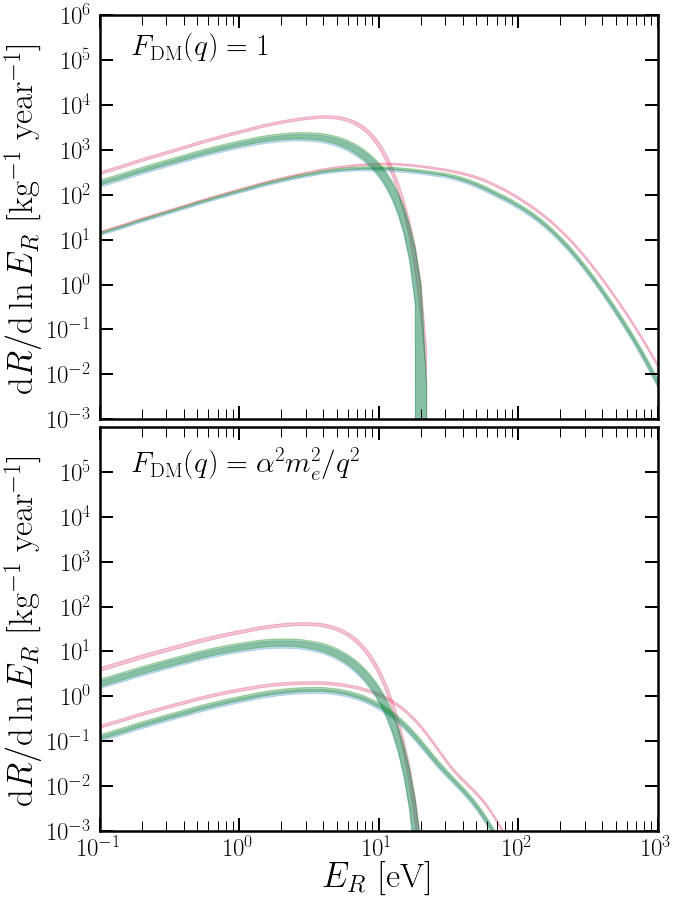

In [187]:
import cmocean
#####
# set up plot
hspace=0.02
lw=2.5
lfs=35
tfs=25
size_x=10
size_y=15

xlab2 = r'$E_R$ [eV]'
ylab2 = r'$\textrm{d}R/\textrm{d}\ln E_R$ [kg$^{-1}$ year$^{-1}$]'
ylab1 = r'$\textrm{d}R/\textrm{d}\ln E_R$ [kg$^{-1}$ year$^{-1}$]'
plt.rcParams['axes.linewidth'] = lw
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=tfs)
fig, axarr = plt.subplots(2, 1,figsize=(size_x,size_y))
gs = gridspec.GridSpec(2, 1)
gs.update(hspace=hspace)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
ax1.set_ylabel(ylab1,fontsize=lfs)
ax2.set_ylabel(ylab2,fontsize=lfs)
ax2.set_xlabel(xlab2,fontsize=lfs)
#####

# Plot    
x = E_r_vals*1000.0 
col = cmocean.cm.phase(linspace(0.2,0.6,2))


def plotHLrange(R_H,R_L,col,alph=0.5):
    fu0H = zeros(shape=ne)
    fl0H = zeros(shape=ne)
    fu1H = zeros(shape=ne)
    fl1H = zeros(shape=ne)
    fu0L = zeros(shape=ne)
    fl0L = zeros(shape=ne)
    fu1L = zeros(shape=ne)
    fl1L = zeros(shape=ne)
    for i in range(0,ne):
        fu0H[i] = amax(R_H[:,i,0])
        fl0H[i] = amin(R_H[:,i,0])
        fu1H[i] = amax(R_H[:,i,1])
        fl1H[i] = amin(R_H[:,i,1])
        fu0L[i] = amax(R_L[:,i,0])
        fl0L[i] = amin(R_L[:,i,0])
        fu1L[i] = amax(R_L[:,i,1])
        fl1L[i] = amin(R_L[:,i,1])
    

    ax1.fill_between(x,fu0H,y2=fl0H,color=col,alpha=alph)
    ax1.fill_between(x,fu1H,y2=fl1H,color=col,alpha=alph)
    ax2.fill_between(x,fu0L,y2=fl0L,color=col,alpha=alph)
    ax2.fill_between(x,fu1L,y2=fl1L,color=col,alpha=alph)

#     ax1.plot(x,fu0H,'-',lw=3,color=col)
#     ax1.plot(x,fu1H,'-',lw=3,color=col)   
#     ax2.plot(x,fu0L,'-',lw=3,color=col)
#     ax2.plot(x,fu1L,'-',lw=3,color=col)  
    
#     ax1.plot(x,fl0H,'-',lw=3,color=col)
#     ax1.plot(x,fl1H,'-',lw=3,color=col)   
#     ax2.plot(x,fl0L,'-',lw=3,color=col)
#     ax2.plot(x,fl1L,'-',lw=3,color=col)  

    return


xi = 0.1
R_H = R_H_SHMpp_gf*(1-xi) + R_H_S1_gf*xi
R_L = R_L_SHMpp_gf*(1-xi) + R_L_S1_gf*xi
plotHLrange(R_H,R_L,col[0,:],alph=0.3)

xi = 0.1
R_H = R_H_SHMpp_gf*(1-xi) + R_H_S2_gf*xi
R_L = R_L_SHMpp_gf*(1-xi) + R_L_S2_gf*xi
plotHLrange(R_H,R_L,col[1,:],alph=0.3)

plotHLrange(R_H_SHMpp_gf,R_L_SHMpp_gf,'green',alph=0.3)


# Tweak ranges on show
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim([0.1,1.0e3])
ax1.set_ylim([1.0e-3,1.0e6])
ax1.set_xticklabels([])
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim([0.1,1.0e3])
ax2.set_ylim([1.0e-3,1.0e6])
ax1.set_yticks(10.0**arange(-3,7))
ax2.set_yticks(10.0**arange(-3,6))

# Labels
ax1.legend(frameon=False,fontsize=25,labelspacing=0.1,borderpad=0.1,handlelength=1)
plt.gcf().text(0.17,0.84,r'$F_{\rm DM}(q) = 1$',fontsize=30)
plt.gcf().text(0.17,0.45,r'$F_{\rm DM}(q) = \alpha^2 m^2_e/q^2$',fontsize=30)

# Save
plt.show()
fig.savefig('../plots/DMRates_AnnualMod.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/DMRates_AnnualMod.png',bbox_inches='tight')


In [ ]:
# Run this just to save the data for future use (if needed)
savetxt('../data/rates/dRdlnE_10GeV_HeavyMediator_SHMpp.txt',vstack((E_r_vals,R_H_SHMpp[:,:,0])),delimiter='\t',fmt="%1.12f")
savetxt('../data/rates/dRdlnE_1000GeV_HeavyMediator_SHMpp.txt',vstack((E_r_vals,R_H_SHMpp[:,:,1])),delimiter='\t',fmt="%1.12f")
savetxt('../data/rates/dRdlnE_10GeV_LightMediator_SHMpp.txt',vstack((E_r_vals,R_L_SHMpp[:,:,0])),delimiter='\t',fmt="%1.12f")
savetxt('../data/rates/dRdlnE_1000GeV_LightMediator_SHMpp.txt',vstack((E_r_vals,R_L_SHMpp[:,:,1])),delimiter='\t',fmt="%1.12f")

savetxt('../data/rates/dRdlnE_10GeV_HeavyMediator_S1.txt',vstack((E_r_vals,R_H_S1[:,:,0])),delimiter='\t',fmt="%1.12f")
savetxt('../data/rates/dRdlnE_1000GeV_HeavyMediator_S1.txt',vstack((E_r_vals,R_H_S1[:,:,1])),delimiter='\t',fmt="%1.12f")
savetxt('../data/rates/dRdlnE_10GeV_LightMediator_S1.txt',vstack((E_r_vals,R_L_S1[:,:,0])),delimiter='\t',fmt="%1.12f")
savetxt('../data/rates/dRdlnE_1000GeV_LightMediator_S1.txt',vstack((E_r_vals,R_L_S1[:,:,1])),delimiter='\t',fmt="%1.12f")

savetxt('../data/rates/dRdlnE_10GeV_HeavyMediator_S2.txt',vstack((E_r_vals,R_H_S2[:,:,0])),delimiter='\t',fmt="%1.12f")
savetxt('../data/rates/dRdlnE_1000GeV_HeavyMediator_S2.txt',vstack((E_r_vals,R_H_S2[:,:,1])),delimiter='\t',fmt="%1.12f")
savetxt('../data/rates/dRdlnE_10GeV_LightMediator_S2.txt',vstack((E_r_vals,R_L_S2[:,:,0])),delimiter='\t',fmt="%1.12f")
savetxt('../data/rates/dRdlnE_1000GeV_LightMediator_S2.txt',vstack((E_r_vals,R_L_S2[:,:,1])),delimiter='\t',fmt="%1.12f")

## Rate modulation kind of hard to see in this way, a better way would be to measure the modulation amplitude.

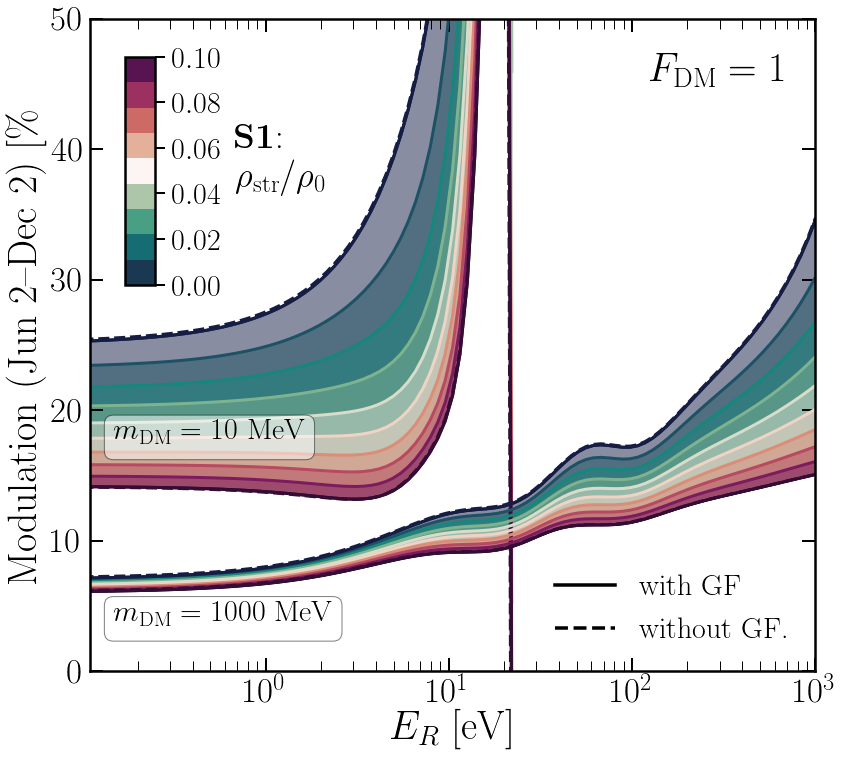

In [246]:
def ModulationAmplitude(dRv):
    Jun2 = argmin(abs(days-152.0))
    Dec2 = argmin(abs(days-336.0))
    ni = shape(dRv)[1]
    Rdiffv = zeros(shape=ni)
    for i in range(0,ni):
        if any(dRv[:,i]<=1.0e-10):
            Rdiffv[i] = nan
        else:
            Rdiffv[i] = 100*(dRv[Jun2,i]-dRv[Dec2,i])/mean(dRv[:,i])
    return Rdiffv

xlab = r'$E_R$ [eV]'
#ylab = r"$\left(\frac{\textrm{d}R}{\textrm{d}\ln E_R}\right)_{\rm Jun\,2} - \left(\frac{\textrm{d}R}{\textrm{d}\ln E_R}\right)_{\rm Dec\,2}$ [ton$^{-1}$ year$^{-1}$]"
ylab = r'Modulation (Jun 2--Dec 2) [\%'
fig,ax1 = MySquarePlot(xlab,ylab,tfs=35,lfs=40)

n_xi = 10
xi_max = 0.1
xi_vals = linspace(0,xi_max,n_xi)
col = (cmocean.cm.curl(linspace(0,1,n_xi)))
cmap = cmocean.cm.curl

x = E_r_vals*1000

def PlotModulationAmplitude(ax,dR0,dR0_gf,dR,dR_gf):
    y2_gf = ModulationAmplitude(xi_max*dR_gf+(1-xi_max)*dR0_gf)
    for i in range(0,n_xi):
        y_gf = ModulationAmplitude(xi_vals[i]*dR_gf+(1-xi_vals[i])*dR0_gf)
        ax.fill_between(x,y_gf,y2=y2_gf,color=col[i,:],alpha=0.5)
        ax.plot(x,y_gf,'-',color=col[i,:],linewidth=3)

    ax.plot(x,ModulationAmplitude(dR0_gf),linewidth=3,color=col[0,:])
    ax.plot(x,y2_gf,linewidth=3,color=col[-1,:])

    y2 = ModulationAmplitude(xi_max*dR+(1-xi_max)*dR0)
    ax.plot(x,ModulationAmplitude(dR0),'--',linewidth=3,color=col[0,:])
    ax.plot(x,y2,'--',linewidth=3,color=col[-1,:])
    return

stream = 'S1' 
med = 'H'
if stream=='S1':
    if med=='H':
        Fstr = r'$F_{\rm DM} = 1$'
        PlotModulationAmplitude(ax1,R_H_SHMpp[:,:,0],R_H_SHMpp_gf[:,:,0],R_H_S1[:,:,0],R_H_S1_gf[:,:,0])
        PlotModulationAmplitude(ax1,R_H_SHMpp[:,:,1],R_H_SHMpp_gf[:,:,1],R_H_S1[:,:,1],R_H_S1_gf[:,:,1])
    if med=='L':
        Fstr = r'$F_{\rm DM} = \alpha^2 m_e^2/q^2$'
        PlotModulationAmplitude(ax1,R_L_SHMpp[:,:,0],R_L_SHMpp_gf[:,:,0],R_L_S1[:,:,0],R_L_S1_gf[:,:,0])
        PlotModulationAmplitude(ax1,R_L_SHMpp[:,:,1],R_L_SHMpp_gf[:,:,1],R_L_S1[:,:,1],R_L_S1_gf[:,:,1])
elif stream=='S2':
    if med=='H':
        Fstr = r'$F_{\rm DM} = 1$'
        PlotModulationAmplitude(ax1,R_H_SHMpp[:,:,0],R_H_SHMpp_gf[:,:,0],R_H_S2[:,:,0],R_H_S2_gf[:,:,0])
        PlotModulationAmplitude(ax1,R_H_SHMpp[:,:,1],R_H_SHMpp_gf[:,:,1],R_H_S2[:,:,1],R_H_S2_gf[:,:,1])
    if med=='L':
        Fstr = r'$F_{\rm DM} = \alpha^2 m_e^2/q^2$'
        PlotModulationAmplitude(ax1,R_L_SHMpp[:,:,0],R_L_SHMpp_gf[:,:,0],R_L_S2[:,:,0],R_L_S2_gf[:,:,0])
        PlotModulationAmplitude(ax1,R_L_SHMpp[:,:,1],R_L_SHMpp_gf[:,:,1],R_L_S2[:,:,1],R_L_S2_gf[:,:,1])
    
#plt.gcf().text(0.27,0.38,r'$m_{\rm DM} = $ '+str(int(m[0]))+' MeV',fontsize=35,bbox=dict(facecolor='w', edgecolor='black',lw=3,alpha=0.5, boxstyle='round,pad=0.4'))
#plt.gcf().text(0.13,0.17,r'$m_{\rm DM} = $ '+str(int(m[1]))+' MeV',fontsize=35,horizontalalignment='left')

#plt.gcf().text(0.87,0.76,r'$\bar{\sigma}_e = 10^{'+str(int(log10(sigma_e)))+'}$ cm$^2$',fontsize=35,horizontalalignment='right')
ax1.set_xscale('log')
#ax1.set_yscale('log')
xmin = x[0]
xmax = x[-1]
ymin = 0.0
ymax = 50.0

ax1.set_xlim(left=0.11,right=xmax)
ax1.set_ylim(bottom=ymin,top=ymax)
ax1.plot([-20,-50],[45,45], 'k-',linewidth=3.5,label='with GF')
ax1.plot([-20,-50],[40,40], 'k--',linewidth=3.5,label='without GF.')
ax1.legend(frameon=False,fontsize=30,loc='lower right')

plt.gcf().text(0.87,0.8,Fstr,fontsize=40,ha='right')

# Custom colorbar
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbaxes = inset_axes(ax1, width="15%", height="30%", bbox_to_anchor=[0, -20, 200, 760]) 
norm = mpl.colors.Normalize(vmin=0,vmax=xi_vals[-1])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cbaxes,ticks=arange(0.0,xi_vals[-1]+0.02,0.02),boundaries=linspace(0,xi_vals[-1],n_xi),orientation='vertical')
f = plt.gcf().get_children()
cbar = f[2]
cbar.tick_params(labelsize=30) 
cbar.tick_params(which='major',direction='out',width=2,length=10,right=True,top=False,pad=7)
cbar.tick_params(which='minor',direction='out',width=2,length=7,right=True,top=False)
plt.gcf().text(0.28,0.73,r'{\bf '+stream+r'}:',fontsize=35,color='k')
plt.gcf().text(0.28,0.68,r'$\rho_{\rm str}/\rho_0$',fontsize=35,color='k')


plt.gcf().text(0.15,0.38,r'$m_{\rm DM} = $ '+str(int(m[0]))+' MeV', size=30,ha="left", va="bottom",bbox=dict(alpha=0.5,boxstyle="round",ec='k',fc='w'))
plt.gcf().text(0.15,0.17,r'$m_{\rm DM} = $ '+str(int(m[1]))+' MeV', size=30,ha="left", va="bottom",bbox=dict(alpha=0.5,boxstyle="round",ec='k',fc='w'))

plt.show()
pltname = 'ModulationAmplitude_'+med+'_'+stream
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')

In [247]:
'../plots/'+pltname+'.pdf'

'../plots/ModulationAmplitude_H_S1.pdf'

In [170]:
any(R_H_SHMpp[:,1,0]==0)

False